In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.style.use('ggplot')


from simulation.analyse import get_win_probabilities, get_simulations
from features.data_provider import get_feature_columns, get_whole_dataset, set_feature_columns
from models.score_model import get_model
from simulation.predictor import MaxProbabilityScorePredictor
from simulation.simulation import run_simulation, run_actual_tournament_simulation
from db.simulation_table import get_simulation_results, delete_all

from notebook_helpers import plot_bank_and_bets, run_unit_strategy, run_kelly_strategy

In [2]:
home = get_whole_dataset("home_score", filter_start="2010-06-11")
away = get_whole_dataset("away_score", filter_start="2010-06-11")
X = pd.concat([home[0], away[0]])
y = pd.concat([home[1], away[1]])
model = get_model(X=X, y=y, n_estimators=5000)
predictor = MaxProbabilityScorePredictor(model)

In [3]:
tournament_template = pd.read_csv('data/original/wc_2010_games_real.csv')
run_actual_tournament_simulation(tournament_template, predictor)
tournament_simulation = get_simulation_results()
tournament_simulation["true_outcome"] = np.sign(tournament_simulation["home_score"] - tournament_simulation["away_score"])
delete_all()

print("Accuracy:", sum(tournament_simulation["outcome"] == tournament_simulation["true_outcome"]) / tournament_template.shape[0])
tournament_simulation

Accuracy: 0.515625


,id,match_id,date,home_team,away_team,home_score,away_score,outcome,home_win_prob,draw_prob,away_win_prob,true_outcome
0,1,0,2010-06-11,South Africa,Mexico,1,1,-1,0.194437,0.247737,0.557824,0
1,2,1,2010-06-11,Uruguay,France,0,0,-1,0.261191,0.289306,0.449503,0
2,3,2,2010-06-12,Argentina,Nigeria,1,0,1,0.556401,0.251930,0.191668,1
3,4,3,2010-06-12,England,United States,1,1,1,0.663225,0.201782,0.134984,0
4,5,4,2010-06-12,Korea Republic,Greece,2,0,1,0.378424,0.286015,0.335561,1
5,6,5,2010-06-13,Algeria,Slovenia,0,1,-1,0.324283,0.262482,0.413235,-1
6,7,6,2010-06-13,Germany,Australia,4,0,1,0.587658,0.246609,0.165731,1
7,8,7,2010-06-13,Serbia,Ghana,0,1,1,0.570248,0.242518,0.187233,-1
8,9,8,2010-06-14,Italy,Paraguay,1,1,1,0.515907,0.280025,0.204068,0
9,10,9,2010-06-14,Japan,Cameroon,1,0,-1,0.361344,0.252185,0.386470,1


In [4]:
match_bets = pd.read_csv('data/original/wc_2010_bets.csv')
match_bets

,id,date,home_team,away_team,1,X,2
0,0,2010-06-11,South Africa,Mexico,2.95,3.13,2.56
1,1,2010-06-11,Uruguay,France,3.57,3.13,2.21
2,2,2010-06-12,Argentina,Nigeria,1.39,4.50,9.04
3,3,2010-06-12,England,United States,1.51,4.10,7.00
4,4,2010-06-12,Korea Republic,Greece,2.71,2.99,2.89
5,5,2010-06-13,Algeria,Slovenia,3.71,3.12,2.14
6,6,2010-06-13,Germany,Australia,1.52,3.89,7.29
7,7,2010-06-13,Serbia,Ghana,2.01,3.22,4.03
8,8,2010-06-14,Italy,Paraguay,2.17,3.03,3.85
9,9,2010-06-14,Japan,Cameroon,3.67,3.12,2.18


Profit: -8.9219%
Balance:  58.29


58.289999999999992

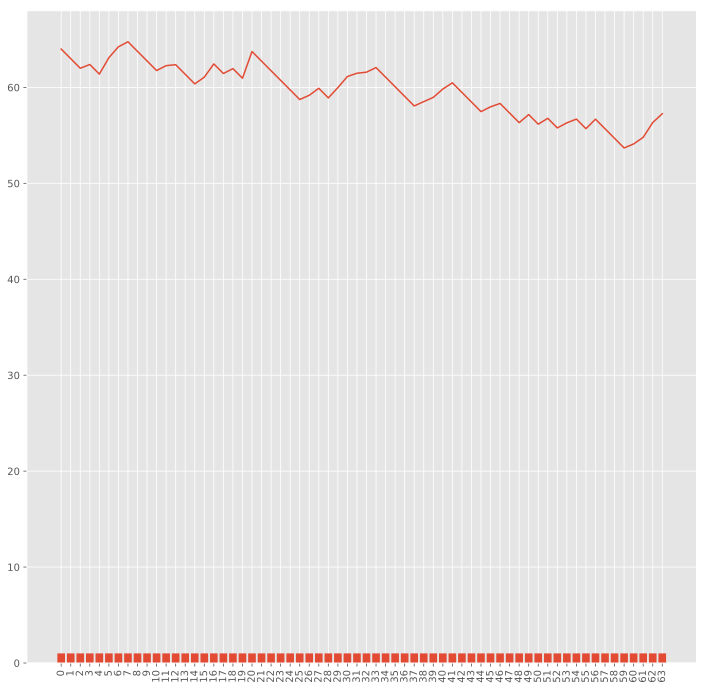

In [5]:
y_pred = tournament_simulation["outcome"].values
y_true = tournament_simulation["true_outcome"].values
odds = match_bets[["1", "X", "2"]].values
run_unit_strategy(y_pred, y_true, odds, plot=True)

Profit: -0.9718%
Balance:  63.3780475768


63.378047576777846

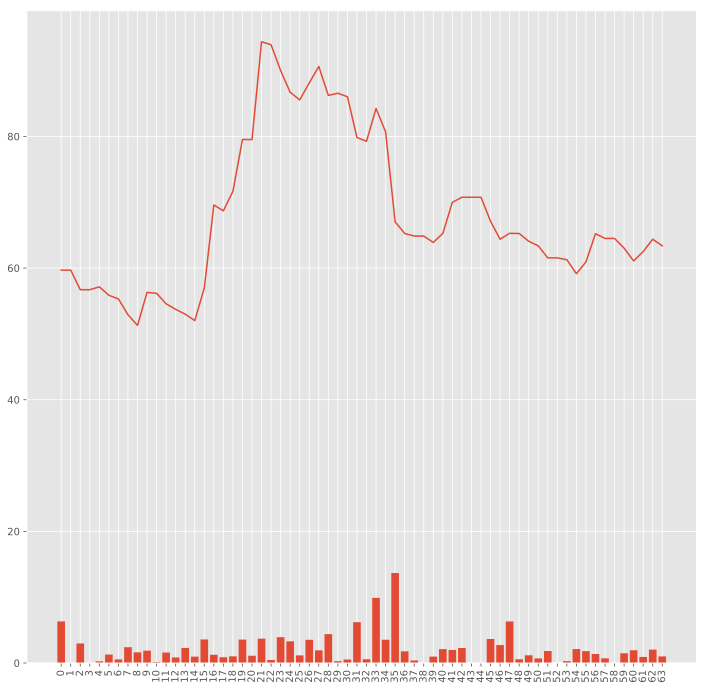

In [6]:
y_pred = tournament_simulation["outcome"].values
y_true = tournament_simulation["true_outcome"].values
odds = match_bets[["1", "X", "2"]].values
probabilities = tournament_simulation[["home_win_prob", "draw_prob", "away_win_prob"]].values
run_kelly_strategy(y_true, odds, probabilities, plot=True, coef=0.3)

In [7]:
X.shape[0]

4230